In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc, cm
rc('animation', html='html5')

In [2]:
import numpy as np
from Snake import AI
from Snake.Game import Game

Using TensorFlow backend.
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [3]:
size = 35, 35
game = Game(*size)
game.map

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 0, 0, ..., 0, 0, 3],
       [3, 0, 0, ..., 0, 0, 3],
       ...,
       [3, 0, 0, ..., 0, 0, 3],
       [3, 0, 0, ..., 0, 0, 3],
       [3, 3, 3, ..., 3, 3, 3]])

In [4]:
game.sniff()

array([0.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.95851455])

The actual map is represented by an array of integers [0,3] which correspond to blank spot, apple, snake and wall.

For sake of this project i created colorfull visualization of the game using pyplot.

## Color schema used
<table>
    <tr style="background-color: black; margin: 10">
        <td height="100" width="100" style = "padding: 15px; background-color: red;">
            <center>Apple</center>
        </td>
        <td height="100" width="100" style = "padding: 15px; background-color: green;">
            <center>Snake</center>
        </td>
        <td height="100" width="100" style = "padding: 15px; background-color: white;">
            <center>Blank spot</center>
        </td>
        <td height="100" width="100" style = "padding: 15px; background-color: #cb7341;">
            <center>Wall</center>
        </td>
    </tr>
</table>

In [18]:
cmap = colors.ListedColormap(['white', 'red', 'green', '#cb7341'])
boundaries = [-.9, -0.75, 0.5, .9]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

<IPython.core.display.Javascript object>


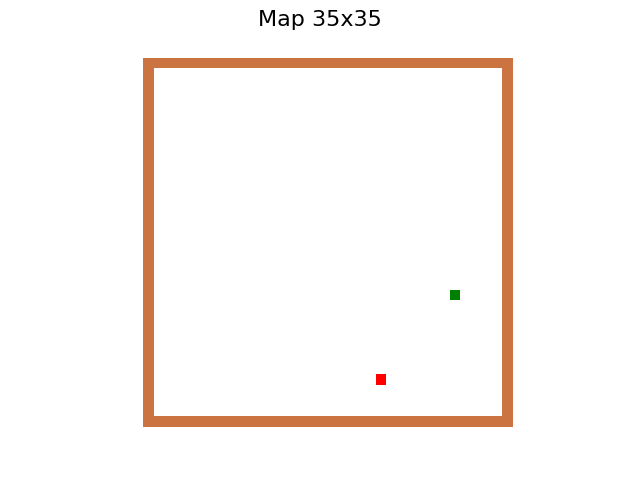

In [7]:
plt.figure().suptitle(f'Map {game.h}x{game.w}', fontsize=16)
plt.axis('off')
plt.imshow(game.map, cmap=cmap, extent=(0,game.h,0,game.w))
plt.plot();

Now the basic visualization is working, let's do the animated version.

In [10]:
def update_screen(ax):
    def f(*args, **kwargs):
        if not game.snake:
            return 
        a = int(input()) % 3
        game.step(a)
        ax.cla()
        ax.imshow(game.map, cmap=cmap, extent=(0,game.h,0,game.w))
        ax.set_title(f"Snake: {game.status}, steps: {game.steps}, lives: {game.score}, apples: {game.eaten}")
        ax.axis('off');
        return ax
    return f

<IPython.core.display.Javascript object>


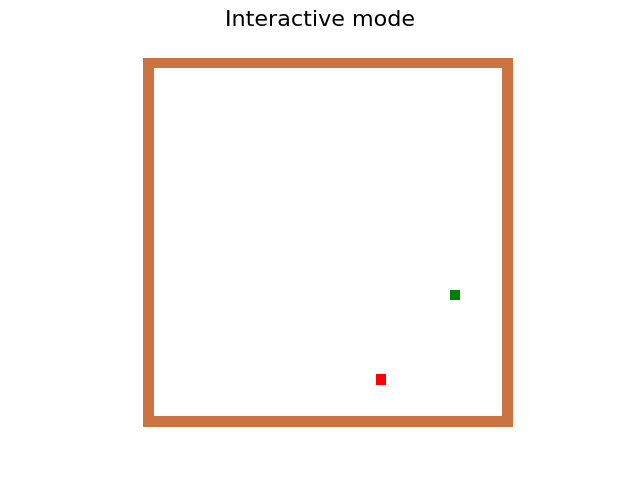

In [11]:
fig, ax = plt.subplots();
fig.suptitle(f'Interactive mode', fontsize=16)
t = update_screen(ax)
ax.imshow(game.map, cmap=cmap, extent=(0,game.h,0,game.w))
anim = animation.FuncAnimation(fig, t, interval=100);
plt.axis('off')
plt.show()

In [47]:
t()

2


In [40]:
game.reset()

### Uncomment and run the cell bellow to input next direction of snake.
 - 0 - Up
 - 1 - Right
 - 2 - Down
 - 3 - Left
 
### To reset the game evaluate the cell below it and re-render plot

In [9]:
#plt.cla()
#game.reset()

# Solving Snake using Genetic Algorithms

In [6]:
import numpy as np
from Snake import AI
from Snake.Game import Game

Using TensorFlow backend.
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eldee/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [12]:
random_weights = np.array([np.random.random_sample() for _ in range(73)])
random_weights

array([0.38516036, 0.20672142, 0.23101866, 0.86476741, 0.59837141,
       0.4344111 , 0.92409618, 0.61813488, 0.39857884, 0.3640164 ,
       0.64203231, 0.15017506, 0.14136492, 0.22591983, 0.6203457 ,
       0.07822093, 0.93353513, 0.21843934, 0.75521033, 0.16792789,
       0.34268154, 0.42213085, 0.21874379, 0.24338907, 0.20449919,
       0.90262125, 0.8244457 , 0.88760702, 0.80313186, 0.75721468,
       0.90420196, 0.40841103, 0.30482525, 0.04355423, 0.67704921,
       0.80874029, 0.66377564, 0.73492802, 0.88587385, 0.08166952,
       0.18422521, 0.29492659, 0.86504715, 0.9662016 , 0.94536275,
       0.26715074, 0.01914777, 0.8257694 , 0.68175155, 0.57429335,
       0.90816496, 0.36229649, 0.74601901, 0.45496428, 0.1018564 ,
       0.56497029, 0.14266685, 0.74321695, 0.30427905, 0.77710784,
       0.20461178, 0.46744051, 0.13155457, 0.609015  , 0.52069533,
       0.77136525, 0.91674199, 0.45300607, 0.21932276, 0.62428228,
       0.27064711, 0.7360244 , 0.76772543])

In [13]:
snake = AI.create_nn(random_weights)

In [14]:
sg = Game(30,30)

In [26]:
snake(sg.sniff().reshape((1,10)))

2

In [33]:
snake(sg.sniff().reshape((1,10)))

2

In [29]:
def update_ai(ax):
    def f(*args, **kwargs):
        if not sg.snake:
            return
        a = snake(sg.sniff().reshape((1,10)))
        sg.step(a)
        ax.cla()
        ax.imshow(sg.map, cmap=cmap, interpolation='nearest', animated=True, extent=(0,sg.h,0,sg.w))
        ax.set_title(f"AISnake: {sg.status}, steps: {sg.steps}, lives: {sg.score}, apples: {sg.eaten}")
        ax.axis('off');
        return ax
    return f        

<IPython.core.display.Javascript object>


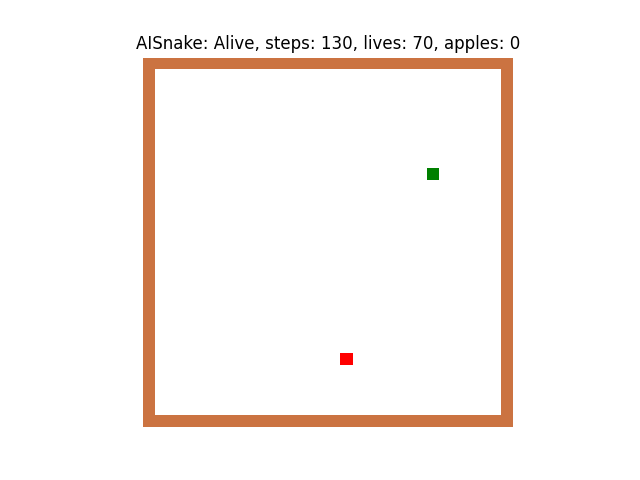

In [34]:
fig, ax = plt.subplots();
f = update_ai(ax);
anim = animation.FuncAnimation(fig, f, interval=1000, save_count=200, blit=True);
plt.axis('off');
plt.show()
#plt.close();
#anim

In [1]:
MU, LAMBDA = 15, 100

In [2]:
size = 227

In [3]:
input_size = 10

In [4]:
from deap import algorithms, base, creator, tools

In [5]:
def fitness_eval(sample):
    snake = AI.create_nn(sample)
    game = Game(30,30)
    while game.snake:
        game.step(snake(game.sniff().reshape((1,input_size))))
    return game.eaten, game.score

In [7]:
creator.create("FitnessFunc", base.Fitness, weights=(1,1)) #todo add self.eaten
creator.create("Individual", list, fitness=creator.FitnessFunc)

In [8]:
tb = base.Toolbox()
tb.register("weight", np.random.uniform, -1, 1)
tb.register("individual", tools.initRepeat, creator.Individual, tb.weight, n=size)
tb.register("population", tools.initRepeat, list, tb.individual)
tb.register("evaluate", fitness_eval)

In [9]:
import multiprocessing

pool = multiprocessing.Pool()
tb.register("map", pool.map)

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
  File "/home/eldee/.local/lib/python3.6/site-packages/keras/engine/training_arrays.py", line 324, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True,

In [10]:
tb.register("mate", tools.cxTwoPoint)
tb.register("mutate",  tools.mutGaussian, mu=0, sigma=0.5, indpb=0.8)
tb.register("select", tools.selTournament, tournsize=3)

In [11]:
pop = tb.population(n=100)
hof = tools.ParetoFront() # hall of fame

In [12]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [13]:
print("Starting GA:")
res = algorithms.eaSimple(pop, tb, mutpb=0.05, cxpb=0.6, ngen=50, stats=stats, halloffame=hof)

Starting GA:
gen	nevals	avg                  	min    	max        
0  	100   	[1.000e-02 4.889e+01]	[0. 0.]	[  1. 366.]
1  	76    	[2.000e-02 8.451e+01]	[0. 0.]	[  1. 366.]
2  	60    	[4.000e-02 9.713e+01]	[0. 0.]	[  1. 339.]
3  	66    	[ 0.1 97.3]          	[0. 0.]	[  1. 361.]
4  	56    	[ 0.09 87.1 ]        	[0. 0.]	[  1. 361.]
5  	67    	[5.000e-02 9.308e+01]	[0. 0.]	[  1. 198.]
6  	59    	[4.0000e-02 1.0708e+02]	[0. 0.]	[  1. 312.]
7  	56    	[2.000e-02 1.224e+02]  	[0. 0.]	[  1. 312.]
8  	53    	[1.0000e-02 1.1062e+02]	[0. 0.]	[  1. 312.]
9  	59    	[3.0000e-02 1.2021e+02]	[0. 0.]	[  1. 384.]
10 	58    	[1.0000e-02 1.1849e+02]	[0. 0.]	[  1. 198.]
11 	61    	[  0.   110.18]        	[0. 0.]	[  0. 198.]
12 	58    	[  0.   126.88]        	[0. 0.]	[  0. 198.]
13 	60    	[  0.   128.65]        	[0. 0.]	[  0. 198.]
14 	60    	[1.0000e-02 1.1705e+02]	[0. 0.]	[  1. 198.]
15 	72    	[1.0000e-02 1.0552e+02]	[0. 0.]	[  1. 198.]
16 	68    	[2.0000e-02 1.0928e+02]	[0. 0.]	[  1. 309.]
17 	57    	

KeyboardInterrupt: 

In [ ]:
snake = AI.create_nn(weights)

In [19]:
snake = AI.create_nn(hof[0])

In [20]:
sg = Game(30, 30)

In [21]:
def update_ai(ax):
    def f(*args, **kwargs):
        if not sg.snake:
            sg.reset()
        a = snake(sg.sniff().reshape((1,input_size))).argmax()
        sg.step(a)
        ax.cla()
        ax.imshow(sg.map, cmap=cmap, interpolation='nearest', animated=True, extent=(0,sg.h,0,sg.w))
        ax.set_title(f"AISnake: {sg.status}, steps: {sg.steps}, lives: {sg.score}, apples: {sg.eaten}")
        ax.axis('off');
        return ax
    return f        

In [22]:
sg.reset()
fig, ax = plt.subplots();
fig.suptitle(f'AI mode', fontsize=16);
f = update_ai(ax);
anim = animation.FuncAnimation(fig, f, save_count=200, blit=True);
plt.axis('off');

plt.show()
#plt.close();
#anim

In [ ]:
anim